## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
np.random.seed(5)
a ,b = -2, 1
X = np.random.uniform(0,20,100).reshape(-1,1)
Y = -2 * X + b
X = np.append(np.ones((X.shape[0],1)),X,axis = 1)
X.shape

(100, 2)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [3]:
def gradient(x,y,alpha,epsilon,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    XT = x.T
    for i in range(max_iter):
        hx = np.dot(x,theta)
        errors = np.subtract(hx,y)
        j = np.sum(errors**2)/(2*m)
        hxs.append(hx)
        thetas.append(theta)
        cost.append(j)
        iteration.append(i)
        print("Iteration %d | The Cost is %f" %(i,j))
        if j <= epsilon :
            return theta,np.array(thetas),cost,iteration,np.array(hxs)
        gradients = (np.dot(XT,errors)*alpha)/m
        theta = theta - gradients
    return theta,np.array(thetas),cost,iteration,np.array(hxs)
t,ts,l,it,hy = gradient(X,Y,.001,.001,1000)

Iteration 0 | The Cost is 247.852119
Iteration 1 | The Cost is 185.817608
Iteration 2 | The Cost is 139.320777
Iteration 3 | The Cost is 104.469925
Iteration 4 | The Cost is 78.348097
Iteration 5 | The Cost is 58.768946
Iteration 6 | The Cost is 44.093736
Iteration 7 | The Cost is 33.094182
Iteration 8 | The Cost is 24.849649
Iteration 9 | The Cost is 18.670089
Iteration 10 | The Cost is 14.038291
Iteration 11 | The Cost is 10.566590
Iteration 12 | The Cost is 7.964417
Iteration 13 | The Cost is 6.013983
Iteration 14 | The Cost is 4.552047
Iteration 15 | The Cost is 3.456256
Iteration 16 | The Cost is 2.634902
Iteration 17 | The Cost is 2.019248
Iteration 18 | The Cost is 1.557771
Iteration 19 | The Cost is 1.211856
Iteration 20 | The Cost is 0.952558
Iteration 21 | The Cost is 0.758181
Iteration 22 | The Cost is 0.612466
Iteration 23 | The Cost is 0.503224
Iteration 24 | The Cost is 0.421319
Iteration 25 | The Cost is 0.359905
Iteration 26 | The Cost is 0.313849
Iteration 27 | The Cos

#### Try your function with any input parameterss of your choice.

In [4]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-23.55338677]


#### Calculate r2 score

In [5]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9984915717414343


#### Plot loss vs. epochs

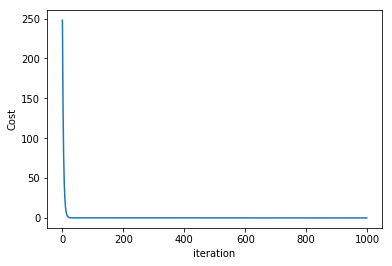

In [6]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [7]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

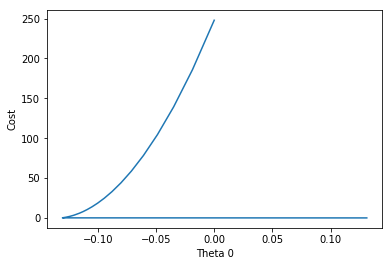

In [8]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

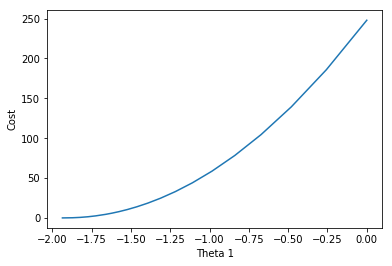

In [9]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

#### Plot all regression lines till converge

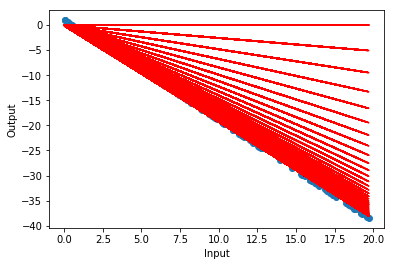

In [10]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

#### Plot the best regression line

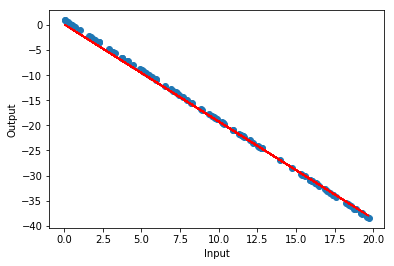

In [11]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [12]:
t,ts,l,it,hy = gradient(X,Y,.00001,.001,1000)

Iteration 0 | The Cost is 247.852119
Iteration 1 | The Cost is 247.187585
Iteration 2 | The Cost is 246.524835
Iteration 3 | The Cost is 245.863862
Iteration 4 | The Cost is 245.204663
Iteration 5 | The Cost is 244.547232
Iteration 6 | The Cost is 243.891565
Iteration 7 | The Cost is 243.237658
Iteration 8 | The Cost is 242.585505
Iteration 9 | The Cost is 241.935102
Iteration 10 | The Cost is 241.286444
Iteration 11 | The Cost is 240.639527
Iteration 12 | The Cost is 239.994345
Iteration 13 | The Cost is 239.350894
Iteration 14 | The Cost is 238.709170
Iteration 15 | The Cost is 238.069167
Iteration 16 | The Cost is 237.430882
Iteration 17 | The Cost is 236.794309
Iteration 18 | The Cost is 236.159445
Iteration 19 | The Cost is 235.526283
Iteration 20 | The Cost is 234.894821
Iteration 21 | The Cost is 234.265053
Iteration 22 | The Cost is 233.636974
Iteration 23 | The Cost is 233.010581
Iteration 24 | The Cost is 232.385868
Iteration 25 | The Cost is 231.762832
Iteration 26 | The Cos

In [13]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-17.42579311]


In [14]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.5360590714299505


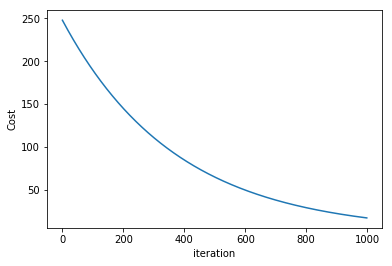

In [15]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [16]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

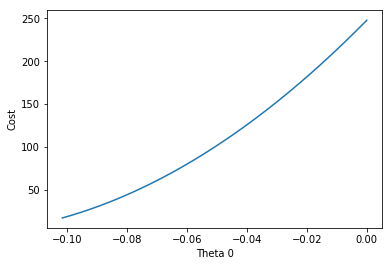

In [17]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

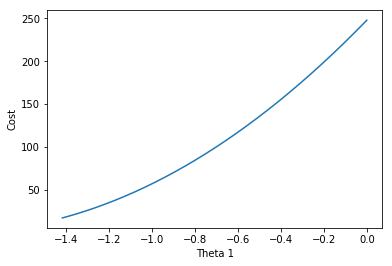

In [18]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

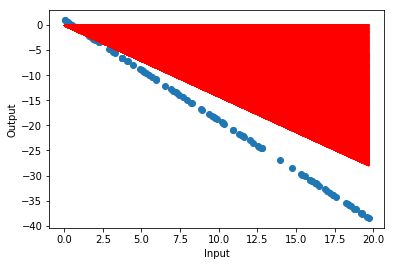

In [19]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

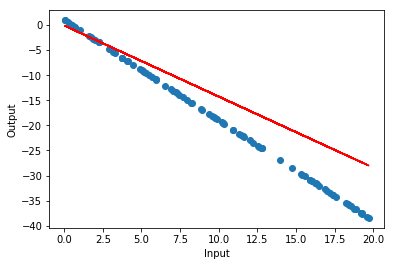

In [20]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [21]:
t,ts,l,it,hy = gradient(X,Y,.001,.001,20)

Iteration 0 | The Cost is 247.852119
Iteration 1 | The Cost is 185.817608
Iteration 2 | The Cost is 139.320777
Iteration 3 | The Cost is 104.469925
Iteration 4 | The Cost is 78.348097
Iteration 5 | The Cost is 58.768946
Iteration 6 | The Cost is 44.093736
Iteration 7 | The Cost is 33.094182
Iteration 8 | The Cost is 24.849649
Iteration 9 | The Cost is 18.670089
Iteration 10 | The Cost is 14.038291
Iteration 11 | The Cost is 10.566590
Iteration 12 | The Cost is 7.964417
Iteration 13 | The Cost is 6.013983
Iteration 14 | The Cost is 4.552047
Iteration 15 | The Cost is 3.456256
Iteration 16 | The Cost is 2.634902
Iteration 17 | The Cost is 2.019248
Iteration 18 | The Cost is 1.557771
Iteration 19 | The Cost is 1.211856


In [22]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-22.25946776]


In [23]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9841141671791706


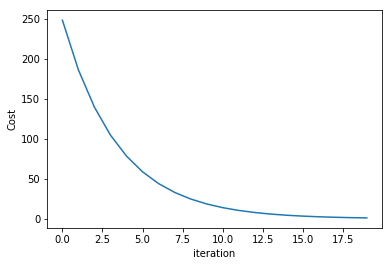

In [24]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [25]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

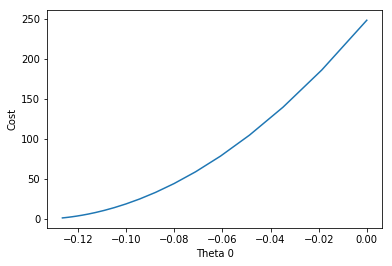

In [26]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

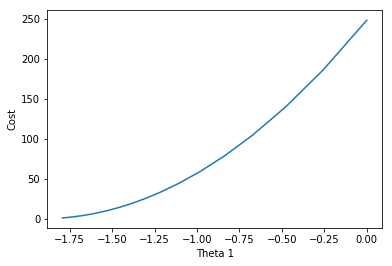

In [27]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

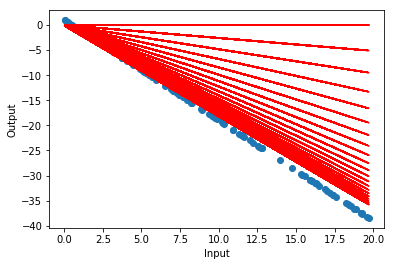

In [28]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

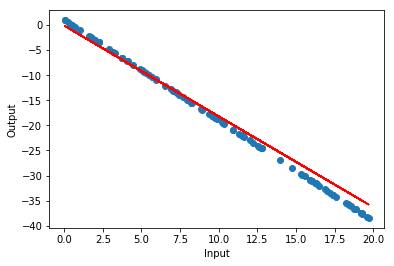

In [29]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [30]:
def miniBatchGD(x,y,alpha,epsilon,b,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    for o in range(1,max_iter):
        jj =0
        for i in range(0,x.shape[0],b):
            XT = x[i:i+b].T
            hx = np.dot(x[i:i+b],theta)
            errors = np.subtract(hx,y[i:i+b])
            j = np.sum(errors**2)/(2*b)
            if j <= epsilon :
                print("Stopped at Iteration %d | The Cost is %f" %(len(cost),j))
                return theta,np.array(thetas),cost,iteration,np.array(hxs)
            gradients = (np.dot(XT,errors)*alpha)/b
            theta = theta - gradients
            print("Iteration %d | The Cost is %f" %(len(cost),j))
            thetas.append(theta)
            cost.append(j)
            iteration.append(len(cost))
            hxs.append(np.dot(x,theta))
    return theta,np.array(thetas),cost,iteration,np.array(hxs)
t,ts,l,it,hy = miniBatchGD(X,Y,.001,.001,4,1000)

Iteration 0 | The Cost is 317.126350
Iteration 1 | The Cost is 185.447609
Iteration 2 | The Cost is 60.681070
Iteration 3 | The Cost is 85.379863
Iteration 4 | The Cost is 61.191047
Iteration 5 | The Cost is 27.349994
Iteration 6 | The Cost is 51.053912
Iteration 7 | The Cost is 37.961706
Iteration 8 | The Cost is 43.311615
Iteration 9 | The Cost is 37.483771
Iteration 10 | The Cost is 37.209640
Iteration 11 | The Cost is 12.392218
Iteration 12 | The Cost is 11.869350
Iteration 13 | The Cost is 0.214987
Iteration 14 | The Cost is 10.992115
Iteration 15 | The Cost is 8.026855
Iteration 16 | The Cost is 1.242210
Iteration 17 | The Cost is 1.142617
Iteration 18 | The Cost is 0.710401
Iteration 19 | The Cost is 1.513097
Iteration 20 | The Cost is 1.200139
Iteration 21 | The Cost is 0.619436
Iteration 22 | The Cost is 0.504973
Iteration 23 | The Cost is 0.260360
Iteration 24 | The Cost is 0.318491
Iteration 25 | The Cost is 0.470032
Iteration 26 | The Cost is 0.091264
Iteration 27 | The Cos

Iteration 1305 | The Cost is 0.081817
Iteration 1306 | The Cost is 0.132975
Iteration 1307 | The Cost is 0.172592
Iteration 1308 | The Cost is 0.080186
Iteration 1309 | The Cost is 0.105950
Iteration 1310 | The Cost is 0.054415
Iteration 1311 | The Cost is 0.116339
Iteration 1312 | The Cost is 0.014241
Iteration 1313 | The Cost is 0.223500
Iteration 1314 | The Cost is 0.020734
Iteration 1315 | The Cost is 0.019329
Iteration 1316 | The Cost is 0.154798
Iteration 1317 | The Cost is 0.117938
Iteration 1318 | The Cost is 0.074217
Iteration 1319 | The Cost is 0.019282
Iteration 1320 | The Cost is 0.090480
Iteration 1321 | The Cost is 0.091678
Iteration 1322 | The Cost is 0.154931
Iteration 1323 | The Cost is 0.027307
Iteration 1324 | The Cost is 0.091910
Iteration 1325 | The Cost is 0.090872
Iteration 1326 | The Cost is 0.013704
Iteration 1327 | The Cost is 0.128931
Iteration 1328 | The Cost is 0.090697
Iteration 1329 | The Cost is 0.036063
Iteration 1330 | The Cost is 0.080707
Iteration 13

Iteration 2494 | The Cost is 0.010145
Iteration 2495 | The Cost is 0.047607
Iteration 2496 | The Cost is 0.048237
Iteration 2497 | The Cost is 0.081518
Iteration 2498 | The Cost is 0.014368
Iteration 2499 | The Cost is 0.048359
Iteration 2500 | The Cost is 0.047813
Iteration 2501 | The Cost is 0.007211
Iteration 2502 | The Cost is 0.067838
Iteration 2503 | The Cost is 0.047721
Iteration 2504 | The Cost is 0.018975
Iteration 2505 | The Cost is 0.042465
Iteration 2506 | The Cost is 0.069016
Iteration 2507 | The Cost is 0.089578
Iteration 2508 | The Cost is 0.041618
Iteration 2509 | The Cost is 0.054990
Iteration 2510 | The Cost is 0.028242
Iteration 2511 | The Cost is 0.060382
Iteration 2512 | The Cost is 0.007391
Iteration 2513 | The Cost is 0.116000
Iteration 2514 | The Cost is 0.010761
Iteration 2515 | The Cost is 0.010032
Iteration 2516 | The Cost is 0.080343
Iteration 2517 | The Cost is 0.061212
Iteration 2518 | The Cost is 0.038520
Iteration 2519 | The Cost is 0.010008
Iteration 25

Iteration 3798 | The Cost is 0.007061
Iteration 3799 | The Cost is 0.023764
Iteration 3800 | The Cost is 0.023496
Iteration 3801 | The Cost is 0.003543
Iteration 3802 | The Cost is 0.033336
Iteration 3803 | The Cost is 0.023451
Iteration 3804 | The Cost is 0.009325
Iteration 3805 | The Cost is 0.020868
Iteration 3806 | The Cost is 0.033915
Iteration 3807 | The Cost is 0.044020
Iteration 3808 | The Cost is 0.020452
Iteration 3809 | The Cost is 0.027023
Iteration 3810 | The Cost is 0.013879
Iteration 3811 | The Cost is 0.029673
Iteration 3812 | The Cost is 0.003632
Iteration 3813 | The Cost is 0.057004
Iteration 3814 | The Cost is 0.005288
Iteration 3815 | The Cost is 0.004930
Iteration 3816 | The Cost is 0.039481
Iteration 3817 | The Cost is 0.030080
Iteration 3818 | The Cost is 0.018929
Iteration 3819 | The Cost is 0.004918
Iteration 3820 | The Cost is 0.023077
Iteration 3821 | The Cost is 0.023383
Iteration 3822 | The Cost is 0.039515
Iteration 3823 | The Cost is 0.006965
Iteration 38

Iteration 4874 | The Cost is 0.013206
Iteration 4875 | The Cost is 0.013057
Iteration 4876 | The Cost is 0.001969
Iteration 4877 | The Cost is 0.018525
Iteration 4878 | The Cost is 0.013032
Iteration 4879 | The Cost is 0.005182
Iteration 4880 | The Cost is 0.011596
Iteration 4881 | The Cost is 0.018847
Iteration 4882 | The Cost is 0.024462
Iteration 4883 | The Cost is 0.011365
Iteration 4884 | The Cost is 0.015017
Iteration 4885 | The Cost is 0.007712
Iteration 4886 | The Cost is 0.016489
Iteration 4887 | The Cost is 0.002018
Iteration 4888 | The Cost is 0.031678
Iteration 4889 | The Cost is 0.002939
Iteration 4890 | The Cost is 0.002740
Iteration 4891 | The Cost is 0.021940
Iteration 4892 | The Cost is 0.016716
Iteration 4893 | The Cost is 0.010519
Iteration 4894 | The Cost is 0.002733
Iteration 4895 | The Cost is 0.012824
Iteration 4896 | The Cost is 0.012994
Iteration 4897 | The Cost is 0.021959
Iteration 4898 | The Cost is 0.003870
Iteration 4899 | The Cost is 0.013027
Iteration 49

In [31]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-23.49419424]


In [32]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9999122077363756


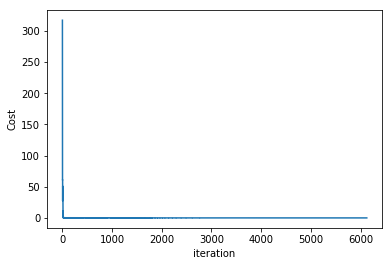

In [33]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [34]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

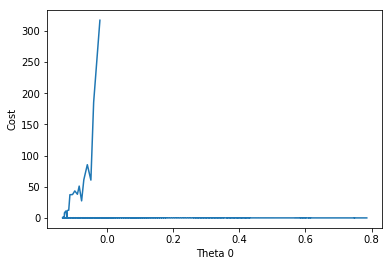

In [35]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

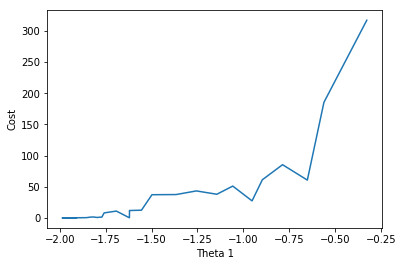

In [36]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

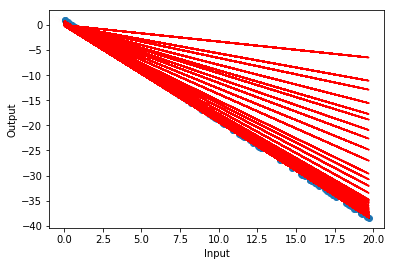

In [37]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

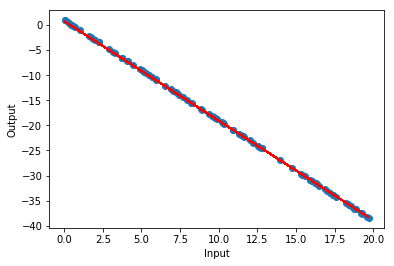

In [39]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [40]:
def SGD(x,y,alpha,epsilon,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    for o in range(max_iter):
        for i in range(x.shape[0]):
            hx = np.dot(x[i,:],theta)
            error = np.subtract(hx,y[i]).reshape(-1,1)
            j = np.sum(error**2)/2
            gradients = (np.dot(X[i,:].reshape(-1,1),error)*alpha)/m
            theta = theta - gradients
            thetas.append(theta)
            cost.append(j)
            iteration.append(len(cost))
            hxs.append(np.dot(x,theta))
            print("Iteration %d | The Cost is %f" %(len(cost),j))
        if cost[-1] <= epsilon :
                print("Stopped at Iteration %d | The Cost is %f" %(len(cost),j))
                return theta,np.array(thetas),cost,iteration,np.array(hxs)
    return theta,np.array(thetas),cost,iteration,np.array(hxs)
t,ts,l,it,hy = SGD(X,Y,.0001,.001,1000)

Iteration 1 | The Cost is 31.045048
Iteration 2 | The Cost is 572.189630
Iteration 3 | The Cost is 26.398426
Iteration 4 | The Cost is 638.401109
Iteration 5 | The Cost is 171.561145
Iteration 6 | The Cost is 274.984132
Iteration 7 | The Cost is 438.344794
Iteration 8 | The Cost is 194.309475
Iteration 9 | The Cost is 58.941365
Iteration 10 | The Cost is 21.120274
Iteration 11 | The Cost is 2.476157
Iteration 12 | The Cost is 406.126928
Iteration 13 | The Cost is 138.213757
Iteration 14 | The Cost is 14.163703
Iteration 15 | The Cost is 582.853221
Iteration 16 | The Cost is 49.429812
Iteration 17 | The Cost is 120.712975
Iteration 18 | The Cost is 58.534169
Iteration 19 | The Cost is 290.438265
Iteration 20 | The Cost is 245.172072
Iteration 21 | The Cost is 263.180396
Iteration 22 | The Cost is 46.146051
Iteration 23 | The Cost is 53.658977
Iteration 24 | The Cost is 41.571119
Iteration 25 | The Cost is 72.838762
Iteration 26 | The Cost is 11.289023
Iteration 27 | The Cost is 15.72129

Iteration 804 | The Cost is 516.319802
Iteration 805 | The Cost is 137.859025
Iteration 806 | The Cost is 221.590723
Iteration 807 | The Cost is 354.012448
Iteration 808 | The Cost is 156.266197
Iteration 809 | The Cost is 46.914081
Iteration 810 | The Cost is 16.551585
Iteration 811 | The Cost is 1.798496
Iteration 812 | The Cost is 327.887346
Iteration 813 | The Cost is 110.893129
Iteration 814 | The Cost is 11.004783
Iteration 815 | The Cost is 471.248023
Iteration 816 | The Cost is 39.260289
Iteration 817 | The Cost is 96.750436
Iteration 818 | The Cost is 46.586698
Iteration 819 | The Cost is 234.114611
Iteration 820 | The Cost is 197.446701
Iteration 821 | The Cost is 212.032813
Iteration 822 | The Cost is 36.620098
Iteration 823 | The Cost is 42.662953
Iteration 824 | The Cost is 32.943488
Iteration 825 | The Cost is 58.111068
Iteration 826 | The Cost is 8.721279
Iteration 827 | The Cost is 12.244769
Iteration 828 | The Cost is 567.625239
Iteration 829 | The Cost is 562.720988
I

Iteration 1613 | The Cost is 88.916916
Iteration 1614 | The Cost is 8.506963
Iteration 1615 | The Cost is 381.109730
Iteration 1616 | The Cost is 31.123848
Iteration 1617 | The Cost is 77.486080
Iteration 1618 | The Cost is 37.017361
Iteration 1619 | The Cost is 188.697288
Iteration 1620 | The Cost is 158.981236
Iteration 1621 | The Cost is 170.800573
Iteration 1622 | The Cost is 29.002109
Iteration 1623 | The Cost is 33.860462
Iteration 1624 | The Cost is 26.049026
Iteration 1625 | The Cost is 46.299845
Iteration 1626 | The Cost is 6.697149
Iteration 1627 | The Cost is 9.492212
Iteration 1628 | The Cost is 459.387471
Iteration 1629 | The Cost is 455.405111
Iteration 1630 | The Cost is 12.974042
Iteration 1631 | The Cost is 0.028230
Iteration 1632 | The Cost is 15.782236
Iteration 1633 | The Cost is 235.631111
Iteration 1634 | The Cost is 295.052836
Iteration 1635 | The Cost is 0.039934
Iteration 1636 | The Cost is 157.200430
Iteration 1637 | The Cost is 0.474360
Iteration 1638 | The C

Iteration 2537 | The Cost is 0.492461
Iteration 2538 | The Cost is 96.476177
Iteration 2539 | The Cost is 152.948316
Iteration 2540 | The Cost is 378.165336
Iteration 2541 | The Cost is 20.865966
Iteration 2542 | The Cost is 246.180917
Iteration 2543 | The Cost is 291.634251
Iteration 2544 | The Cost is 329.107916
Iteration 2545 | The Cost is 0.476383
Iteration 2546 | The Cost is 78.601541
Iteration 2547 | The Cost is 373.816092
Iteration 2548 | The Cost is 55.047266
Iteration 2549 | The Cost is 252.719661
Iteration 2550 | The Cost is 108.809895
Iteration 2551 | The Cost is 225.448800
Iteration 2552 | The Cost is 84.099199
Iteration 2553 | The Cost is 0.019863
Iteration 2554 | The Cost is 1.064637
Iteration 2555 | The Cost is 2.374658
Iteration 2556 | The Cost is 19.328010
Iteration 2557 | The Cost is 359.988920
Iteration 2558 | The Cost is 147.961988
Iteration 2559 | The Cost is 253.977008
Iteration 2560 | The Cost is 117.031151
Iteration 2561 | The Cost is 149.582964
Iteration 2562 |

Iteration 3469 | The Cost is 84.595981
Iteration 3470 | The Cost is 188.812913
Iteration 3471 | The Cost is 0.034827
Iteration 3472 | The Cost is 7.225665
Iteration 3473 | The Cost is 34.856979
Iteration 3474 | The Cost is 13.686445
Iteration 3475 | The Cost is 188.158261
Iteration 3476 | The Cost is 32.019435
Iteration 3477 | The Cost is 118.215325
Iteration 3478 | The Cost is 67.674382
Iteration 3479 | The Cost is 97.282615
Iteration 3480 | The Cost is 266.628104
Iteration 3481 | The Cost is 268.960792
Iteration 3482 | The Cost is 1.651229
Iteration 3483 | The Cost is 212.519544
Iteration 3484 | The Cost is 30.687088
Iteration 3485 | The Cost is 1.181685
Iteration 3486 | The Cost is 38.664185
Iteration 3487 | The Cost is 72.634529
Iteration 3488 | The Cost is 279.056466
Iteration 3489 | The Cost is 35.983493
Iteration 3490 | The Cost is 0.269668
Iteration 3491 | The Cost is 220.755349
Iteration 3492 | The Cost is 1.618085
Iteration 3493 | The Cost is 62.955395
Iteration 3494 | The Co

Iteration 4342 | The Cost is 152.616322
Iteration 4343 | The Cost is 181.184861
Iteration 4344 | The Cost is 204.759406
Iteration 4345 | The Cost is 0.510130
Iteration 4346 | The Cost is 47.740645
Iteration 4347 | The Cost is 232.906261
Iteration 4348 | The Cost is 33.126870
Iteration 4349 | The Cost is 156.729916
Iteration 4350 | The Cost is 66.560509
Iteration 4351 | The Cost is 139.604286
Iteration 4352 | The Cost is 51.162034
Iteration 4353 | The Cost is 0.076187
Iteration 4354 | The Cost is 0.435085
Iteration 4355 | The Cost is 1.136014
Iteration 4356 | The Cost is 11.181560
Iteration 4357 | The Cost is 224.208275
Iteration 4358 | The Cost is 91.030749
Iteration 4359 | The Cost is 157.526220
Iteration 4360 | The Cost is 71.695245
Iteration 4361 | The Cost is 92.046784
Iteration 4362 | The Cost is 155.415024
Iteration 4363 | The Cost is 205.386474
Iteration 4364 | The Cost is 198.744830
Iteration 4365 | The Cost is 160.394261
Iteration 4366 | The Cost is 0.610330
Iteration 4367 | T

Iteration 5138 | The Cost is 47.217088
Iteration 5139 | The Cost is 75.866090
Iteration 5140 | The Cost is 191.117779
Iteration 5141 | The Cost is 9.459250
Iteration 5142 | The Cost is 123.451681
Iteration 5143 | The Cost is 146.727045
Iteration 5144 | The Cost is 165.942869
Iteration 5145 | The Cost is 0.522956
Iteration 5146 | The Cost is 38.200822
Iteration 5147 | The Cost is 188.894644
Iteration 5148 | The Cost is 26.376291
Iteration 5149 | The Cost is 126.804700
Iteration 5150 | The Cost is 53.462314
Iteration 5151 | The Cost is 112.858413
Iteration 5152 | The Cost is 40.973706
Iteration 5153 | The Cost is 0.106482
Iteration 5154 | The Cost is 0.271416
Iteration 5155 | The Cost is 0.790057
Iteration 5156 | The Cost is 8.713216
Iteration 5157 | The Cost is 181.805047
Iteration 5158 | The Cost is 73.339693
Iteration 5159 | The Cost is 127.455995
Iteration 5160 | The Cost is 57.631727
Iteration 5161 | The Cost is 74.166266
Iteration 5162 | The Cost is 125.737419
Iteration 5163 | The 

Iteration 6031 | The Cost is 0.192824
Iteration 6032 | The Cost is 3.802747
Iteration 6033 | The Cost is 72.504136
Iteration 6034 | The Cost is 91.567413
Iteration 6035 | The Cost is 0.209277
Iteration 6036 | The Cost is 47.504461
Iteration 6037 | The Cost is 0.546961
Iteration 6038 | The Cost is 36.815042
Iteration 6039 | The Cost is 59.501636
Iteration 6040 | The Cost is 151.113186
Iteration 6041 | The Cost is 7.123697
Iteration 6042 | The Cost is 97.283573
Iteration 6043 | The Cost is 115.789988
Iteration 6044 | The Cost is 131.077785
Iteration 6045 | The Cost is 0.535960
Iteration 6046 | The Cost is 29.693157
Iteration 6047 | The Cost is 149.346844
Iteration 6048 | The Cost is 20.372878
Iteration 6049 | The Cost is 99.951136
Iteration 6050 | The Cost is 41.756333
Iteration 6051 | The Cost is 88.868626
Iteration 6052 | The Cost is 31.883307
Iteration 6053 | The Cost is 0.141966
Iteration 6054 | The Cost is 0.145798
Iteration 6055 | The Cost is 0.505820
Iteration 6056 | The Cost is 6

Iteration 6987 | The Cost is 27.592376
Iteration 6988 | The Cost is 111.684676
Iteration 6989 | The Cost is 13.056414
Iteration 6990 | The Cost is 0.385225
Iteration 6991 | The Cost is 87.765738
Iteration 6992 | The Cost is 0.294849
Iteration 6993 | The Cost is 23.726117
Iteration 6994 | The Cost is 85.564430
Iteration 6995 | The Cost is 28.066802
Iteration 6996 | The Cost is 20.201899
Iteration 6997 | The Cost is 75.041954
Iteration 6998 | The Cost is 0.277079
Iteration 6999 | The Cost is 35.724968
Iteration 7000 | The Cost is 16.627228
Iteration 7001 | The Cost is 3.412740
Iteration 7002 | The Cost is 89.982353
Iteration 7003 | The Cost is 2.778174
Iteration 7004 | The Cost is 100.931697
Iteration 7005 | The Cost is 24.807936
Iteration 7006 | The Cost is 41.363646
Iteration 7007 | The Cost is 67.966840
Iteration 7008 | The Cost is 28.421782
Iteration 7009 | The Cost is 7.420961
Iteration 7010 | The Cost is 2.076995
Iteration 7011 | The Cost is 0.033486
Iteration 7012 | The Cost is 62

Iteration 7887 | The Cost is 21.459505
Iteration 7888 | The Cost is 88.428324
Iteration 7889 | The Cost is 9.990652
Iteration 7890 | The Cost is 0.409406
Iteration 7891 | The Cost is 69.334252
Iteration 7892 | The Cost is 0.163791
Iteration 7893 | The Cost is 18.401345
Iteration 7894 | The Cost is 67.578747
Iteration 7895 | The Cost is 21.835766
Iteration 7896 | The Cost is 15.617730
Iteration 7897 | The Cost is 59.187996
Iteration 7898 | The Cost is 0.308262
Iteration 7899 | The Cost is 27.906040
Iteration 7900 | The Cost is 12.799434
Iteration 7901 | The Cost is 2.482508
Iteration 7902 | The Cost is 71.105447
Iteration 7903 | The Cost is 1.998013
Iteration 7904 | The Cost is 79.845692
Iteration 7905 | The Cost is 19.257640
Iteration 7906 | The Cost is 32.382989
Iteration 7907 | The Cost is 53.551050
Iteration 7908 | The Cost is 22.117956
Iteration 7909 | The Cost is 5.582331
Iteration 7910 | The Cost is 1.466561
Iteration 7911 | The Cost is 0.006655
Iteration 7912 | The Cost is 49.35

Iteration 8737 | The Cost is 0.575372
Iteration 8738 | The Cost is 17.341645
Iteration 8739 | The Cost is 28.674690
Iteration 8740 | The Cost is 75.108444
Iteration 8741 | The Cost is 2.912462
Iteration 8742 | The Cost is 47.741669
Iteration 8743 | The Cost is 57.131790
Iteration 8744 | The Cost is 64.906413
Iteration 8745 | The Cost is 0.567196
Iteration 8746 | The Cost is 13.818470
Iteration 8747 | The Cost is 74.214469
Iteration 8748 | The Cost is 9.246374
Iteration 8749 | The Cost is 49.097998
Iteration 8750 | The Cost is 19.801752
Iteration 8751 | The Cost is 43.486802
Iteration 8752 | The Cost is 14.901535
Iteration 8753 | The Cost is 0.246155
Iteration 8754 | The Cost is 0.002760
Iteration 8755 | The Cost is 0.084542
Iteration 8756 | The Cost is 2.646054
Iteration 8757 | The Cost is 71.346213
Iteration 8758 | The Cost is 27.677370
Iteration 8759 | The Cost is 49.366611
Iteration 8760 | The Cost is 21.449704
Iteration 8761 | The Cost is 28.007797
Iteration 8762 | The Cost is 48.6

Iteration 9623 | The Cost is 2.825993
Iteration 9624 | The Cost is 1.995017
Iteration 9625 | The Cost is 4.207680
Iteration 9626 | The Cost is 0.218457
Iteration 9627 | The Cost is 0.425902
Iteration 9628 | The Cost is 56.950521
Iteration 9629 | The Cost is 56.426698
Iteration 9630 | The Cost is 0.719789
Iteration 9631 | The Cost is 0.322419
Iteration 9632 | The Cost is 0.975521
Iteration 9633 | The Cost is 27.686942
Iteration 9634 | The Cost is 35.381306
Iteration 9635 | The Cost is 0.336124
Iteration 9636 | The Cost is 17.686475
Iteration 9637 | The Cost is 0.582825
Iteration 9638 | The Cost is 13.458263
Iteration 9639 | The Cost is 22.471311
Iteration 9640 | The Cost is 59.626747
Iteration 9641 | The Cost is 2.119660
Iteration 9642 | The Cost is 37.700580
Iteration 9643 | The Cost is 45.217733
Iteration 9644 | The Cost is 51.447501
Iteration 9645 | The Cost is 0.575412
Iteration 9646 | The Cost is 10.668000
Iteration 9647 | The Cost is 58.911763
Iteration 9648 | The Cost is 7.060304

Iteration 10590 | The Cost is 0.469418
Iteration 10591 | The Cost is 34.348225
Iteration 10592 | The Cost is 0.005995
Iteration 10593 | The Cost is 8.489125
Iteration 10594 | The Cost is 33.447658
Iteration 10595 | The Cost is 10.197925
Iteration 10596 | The Cost is 7.113480
Iteration 10597 | The Cost is 29.144909
Iteration 10598 | The Cost is 0.388560
Iteration 10599 | The Cost is 13.239779
Iteration 10600 | The Cost is 5.730852
Iteration 10601 | The Cost is 0.869192
Iteration 10602 | The Cost is 35.263327
Iteration 10603 | The Cost is 0.662579
Iteration 10604 | The Cost is 39.762873
Iteration 10605 | The Cost is 8.915703
Iteration 10606 | The Cost is 15.497664
Iteration 10607 | The Cost is 26.263561
Iteration 10608 | The Cost is 10.340752
Iteration 10609 | The Cost is 2.271244
Iteration 10610 | The Cost is 0.443844
Iteration 10611 | The Cost is 0.025091
Iteration 10612 | The Cost is 24.119708
Iteration 10613 | The Cost is 6.865621
Iteration 10614 | The Cost is 0.192890
Iteration 1061

Iteration 11462 | The Cost is 24.050289
Iteration 11463 | The Cost is 32.565855
Iteration 11464 | The Cost is 31.430339
Iteration 11465 | The Cost is 24.897785
Iteration 11466 | The Cost is 0.015378
Iteration 11467 | The Cost is 3.038888
Iteration 11468 | The Cost is 0.285932
Iteration 11469 | The Cost is 9.240439
Iteration 11470 | The Cost is 22.916114
Iteration 11471 | The Cost is 0.181009
Iteration 11472 | The Cost is 0.287879
Iteration 11473 | The Cost is 3.144682
Iteration 11474 | The Cost is 0.856653
Iteration 11475 | The Cost is 22.830925
Iteration 11476 | The Cost is 2.819196
Iteration 11477 | The Cost is 13.574860
Iteration 11478 | The Cost is 7.111460
Iteration 11479 | The Cost is 10.865540
Iteration 11480 | The Cost is 33.444464
Iteration 11481 | The Cost is 33.764333
Iteration 11482 | The Cost is 0.000008
Iteration 11483 | The Cost is 26.113190
Iteration 11484 | The Cost is 2.668744
Iteration 11485 | The Cost is 0.006244
Iteration 11486 | The Cost is 3.589631
Iteration 1148

Iteration 12350 | The Cost is 7.209242
Iteration 12351 | The Cost is 16.889089
Iteration 12352 | The Cost is 5.259531
Iteration 12353 | The Cost is 0.360701
Iteration 12354 | The Cost is 0.055740
Iteration 12355 | The Cost is 0.006059
Iteration 12356 | The Cost is 0.655482
Iteration 12357 | The Cost is 28.518043
Iteration 12358 | The Cost is 10.393992
Iteration 12359 | The Cost is 19.330932
Iteration 12360 | The Cost is 7.872734
Iteration 12361 | The Cost is 10.529450
Iteration 12362 | The Cost is 19.045745
Iteration 12363 | The Cost is 25.916534
Iteration 12364 | The Cost is 24.999707
Iteration 12365 | The Cost is 19.729319
Iteration 12366 | The Cost is 0.035557
Iteration 12367 | The Cost is 2.256506
Iteration 12368 | The Cost is 0.314113
Iteration 12369 | The Cost is 7.161911
Iteration 12370 | The Cost is 18.133006
Iteration 12371 | The Cost is 0.212993
Iteration 12372 | The Cost is 0.167733
Iteration 12373 | The Cost is 2.339156
Iteration 12374 | The Cost is 0.580335
Iteration 12375

Iteration 13183 | The Cost is 16.872185
Iteration 13184 | The Cost is 1.488765
Iteration 13185 | The Cost is 0.040937
Iteration 13186 | The Cost is 2.064800
Iteration 13187 | The Cost is 4.722992
Iteration 13188 | The Cost is 22.920408
Iteration 13189 | The Cost is 1.868663
Iteration 13190 | The Cost is 0.511967
Iteration 13191 | The Cost is 17.620104
Iteration 13192 | The Cost is 0.020491
Iteration 13193 | The Cost is 3.942765
Iteration 13194 | The Cost is 17.136956
Iteration 13195 | The Cost is 4.821162
Iteration 13196 | The Cost is 3.242480
Iteration 13197 | The Cost is 14.830030
Iteration 13198 | The Cost is 0.447733
Iteration 13199 | The Cost is 6.400832
Iteration 13200 | The Cost is 2.546236
Iteration 13201 | The Cost is 0.248585
Iteration 13202 | The Cost is 18.115373
Iteration 13203 | The Cost is 0.167929
Iteration 13204 | The Cost is 20.540310
Iteration 13205 | The Cost is 4.162263
Iteration 13206 | The Cost is 7.583938
Iteration 13207 | The Cost is 13.291688
Iteration 13208 |

Iteration 14031 | The Cost is 0.435357
Iteration 14032 | The Cost is 0.088320
Iteration 14033 | The Cost is 8.566271
Iteration 14034 | The Cost is 11.216976
Iteration 14035 | The Cost is 0.445098
Iteration 14036 | The Cost is 5.184935
Iteration 14037 | The Cost is 0.608649
Iteration 14038 | The Cost is 3.789645
Iteration 14039 | The Cost is 6.792346
Iteration 14040 | The Cost is 19.719854
Iteration 14041 | The Cost is 0.342691
Iteration 14042 | The Cost is 12.024229
Iteration 14043 | The Cost is 14.647663
Iteration 14044 | The Cost is 16.835914
Iteration 14045 | The Cost is 0.603976
Iteration 14046 | The Cost is 2.888079
Iteration 14047 | The Cost is 19.471571
Iteration 14048 | The Cost is 1.754892
Iteration 14049 | The Cost is 12.405257
Iteration 14050 | The Cost is 4.433125
Iteration 14051 | The Cost is 10.848483
Iteration 14052 | The Cost is 3.164476
Iteration 14053 | The Cost is 0.402934
Iteration 14054 | The Cost is 0.109409
Iteration 14055 | The Cost is 0.039512
Iteration 14056 |

Iteration 14957 | The Cost is 14.955969
Iteration 14958 | The Cost is 5.099494
Iteration 14959 | The Cost is 9.922265
Iteration 14960 | The Cost is 3.764881
Iteration 14961 | The Cost is 5.172112
Iteration 14962 | The Cost is 9.767734
Iteration 14963 | The Cost is 13.527513
Iteration 14964 | The Cost is 13.024534
Iteration 14965 | The Cost is 10.141265
Iteration 14966 | The Cost is 0.113284
Iteration 14967 | The Cost is 0.900894
Iteration 14968 | The Cost is 0.383633
Iteration 14969 | The Cost is 3.392791
Iteration 14970 | The Cost is 9.272768
Iteration 14971 | The Cost is 0.296078
Iteration 14972 | The Cost is 0.013994
Iteration 14973 | The Cost is 0.940790
Iteration 14974 | The Cost is 0.149136
Iteration 14975 | The Cost is 9.236263
Iteration 14976 | The Cost is 0.819159
Iteration 14977 | The Cost is 5.225904
Iteration 14978 | The Cost is 2.513053
Iteration 14979 | The Cost is 4.075655
Iteration 14980 | The Cost is 13.923392
Iteration 14981 | The Cost is 14.066213
Iteration 14982 | T

Iteration 15744 | The Cost is 11.057671
Iteration 15745 | The Cost is 0.611125
Iteration 15746 | The Cost is 1.696418
Iteration 15747 | The Cost is 12.858249
Iteration 15748 | The Cost is 0.974470
Iteration 15749 | The Cost is 8.045387
Iteration 15750 | The Cost is 2.703621
Iteration 15751 | The Cost is 6.992167
Iteration 15752 | The Cost is 1.875360
Iteration 15753 | The Cost is 0.438122
Iteration 15754 | The Cost is 0.164884
Iteration 15755 | The Cost is 0.087009
Iteration 15756 | The Cost is 0.107564
Iteration 15757 | The Cost is 12.307528
Iteration 15758 | The Cost is 4.091618
Iteration 15759 | The Cost is 8.099873
Iteration 15760 | The Cost is 2.990626
Iteration 15761 | The Cost is 4.151803
Iteration 15762 | The Cost is 7.971220
Iteration 15763 | The Cost is 11.112484
Iteration 15764 | The Cost is 10.691839
Iteration 15765 | The Cost is 8.283112
Iteration 15766 | The Cost is 0.138851
Iteration 15767 | The Cost is 0.663179
Iteration 15768 | The Cost is 0.401590
Iteration 15769 | Th

Iteration 16600 | The Cost is 0.801954
Iteration 16601 | The Cost is 0.013983
Iteration 16602 | The Cost is 7.731120
Iteration 16603 | The Cost is 0.003065
Iteration 16604 | The Cost is 8.857008
Iteration 16605 | The Cost is 1.465400
Iteration 16606 | The Cost is 2.945543
Iteration 16607 | The Cost is 5.514162
Iteration 16608 | The Cost is 1.776612
Iteration 16609 | The Cost is 0.179878
Iteration 16610 | The Cost is 0.000534
Iteration 16611 | The Cost is 0.213191
Iteration 16612 | The Cost is 4.994408
Iteration 16613 | The Cost is 1.032860
Iteration 16614 | The Cost is 0.020688
Iteration 16615 | The Cost is 7.919804
Iteration 16616 | The Cost is 0.109216
Iteration 16617 | The Cost is 0.818685
Iteration 16618 | The Cost is 0.176866
Iteration 16619 | The Cost is 3.182462
Iteration 16620 | The Cost is 2.506176
Iteration 16621 | The Cost is 2.772866
Iteration 16622 | The Cost is 0.087738
Iteration 16623 | The Cost is 0.139493
Iteration 16624 | The Cost is 0.060555
Iteration 16625 | The Cos

Iteration 17421 | The Cost is 2.209175
Iteration 17422 | The Cost is 0.046852
Iteration 17423 | The Cost is 0.083027
Iteration 17424 | The Cost is 0.028887
Iteration 17425 | The Cost is 0.203462
Iteration 17426 | The Cost is 0.060452
Iteration 17427 | The Cost is 0.027015
Iteration 17428 | The Cost is 8.232654
Iteration 17429 | The Cost is 8.146003
Iteration 17430 | The Cost is 0.006105
Iteration 17431 | The Cost is 0.491942
Iteration 17432 | The Cost is 0.000283
Iteration 17433 | The Cost is 3.475200
Iteration 17434 | The Cost is 4.693102
Iteration 17435 | The Cost is 0.499330
Iteration 17436 | The Cost is 1.958533
Iteration 17437 | The Cost is 0.620105
Iteration 17438 | The Cost is 1.353023
Iteration 17439 | The Cost is 2.673252
Iteration 17440 | The Cost is 8.687095
Iteration 17441 | The Cost is 0.035887
Iteration 17442 | The Cost is 5.068564
Iteration 17443 | The Cost is 6.293515
Iteration 17444 | The Cost is 7.323332
Iteration 17445 | The Cost is 0.616725
Iteration 17446 | The Cos

Iteration 18276 | The Cost is 0.196582
Iteration 18277 | The Cost is 2.107230
Iteration 18278 | The Cost is 0.883647
Iteration 18279 | The Cost is 1.579054
Iteration 18280 | The Cost is 6.285334
Iteration 18281 | The Cost is 6.355802
Iteration 18282 | The Cost is 0.161744
Iteration 18283 | The Cost is 4.704263
Iteration 18284 | The Cost is 0.177087
Iteration 18285 | The Cost is 0.193973
Iteration 18286 | The Cost is 0.304811
Iteration 18287 | The Cost is 0.995859
Iteration 18288 | The Cost is 6.660869
Iteration 18289 | The Cost is 0.259929
Iteration 18290 | The Cost is 0.564205
Iteration 18291 | The Cost is 4.945472
Iteration 18292 | The Cost is 0.163656
Iteration 18293 | The Cost is 0.782361
Iteration 18294 | The Cost is 4.791326
Iteration 18295 | The Cost is 1.023753
Iteration 18296 | The Cost is 0.596946
Iteration 18297 | The Cost is 4.057294
Iteration 18298 | The Cost is 0.522776
Iteration 18299 | The Cost is 1.474672
Iteration 18300 | The Cost is 0.420656
Iteration 18301 | The Cos

Iteration 19161 | The Cost is 1.619962
Iteration 19162 | The Cost is 3.412053
Iteration 19163 | The Cost is 4.929248
Iteration 19164 | The Cost is 4.724966
Iteration 19165 | The Cost is 3.562100
Iteration 19166 | The Cost is 0.239115
Iteration 19167 | The Cost is 0.143457
Iteration 19168 | The Cost is 0.462208
Iteration 19169 | The Cost is 0.963022
Iteration 19170 | The Cost is 3.216358
Iteration 19171 | The Cost is 0.395719
Iteration 19172 | The Cost is 0.033109
Iteration 19173 | The Cost is 0.154343
Iteration 19174 | The Cost is 0.000001
Iteration 19175 | The Cost is 3.202345
Iteration 19176 | The Cost is 0.121894
Iteration 19177 | The Cost is 1.641660
Iteration 19178 | The Cost is 0.653347
Iteration 19179 | The Cost is 1.212171
Iteration 19180 | The Cost is 5.094317
Iteration 19181 | The Cost is 5.153072
Iteration 19182 | The Cost is 0.187115
Iteration 19183 | The Cost is 3.781072
Iteration 19184 | The Cost is 0.107794
Iteration 19185 | The Cost is 0.218957
Iteration 19186 | The Cos

Iteration 20102 | The Cost is 3.326902
Iteration 20103 | The Cost is 0.030326
Iteration 20104 | The Cost is 3.870948
Iteration 20105 | The Cost is 0.452835
Iteration 20106 | The Cost is 1.089491
Iteration 20107 | The Cost is 2.271761
Iteration 20108 | The Cost is 0.581767
Iteration 20109 | The Cost is 0.009281
Iteration 20110 | The Cost is 0.053650
Iteration 20111 | The Cost is 0.306107
Iteration 20112 | The Cost is 2.028326
Iteration 20113 | The Cost is 0.281581
Iteration 20114 | The Cost is 0.102483
Iteration 20115 | The Cost is 3.419487
Iteration 20116 | The Cost is 0.000769
Iteration 20117 | The Cost is 0.201554
Iteration 20118 | The Cost is 0.008801
Iteration 20119 | The Cost is 1.196243
Iteration 20120 | The Cost is 0.895774
Iteration 20121 | The Cost is 1.013441
Iteration 20122 | The Cost is 0.000007
Iteration 20123 | The Cost is 0.003523
Iteration 20124 | The Cost is 0.001162
Iteration 20125 | The Cost is 0.035414
Iteration 20126 | The Cost is 0.131677
Iteration 20127 | The Cos

Iteration 20911 | The Cost is 0.323501
Iteration 20912 | The Cost is 1.655247
Iteration 20913 | The Cost is 0.200887
Iteration 20914 | The Cost is 0.122519
Iteration 20915 | The Cost is 2.840347
Iteration 20916 | The Cost is 0.000559
Iteration 20917 | The Cost is 0.138064
Iteration 20918 | The Cost is 0.001472
Iteration 20919 | The Cost is 0.953649
Iteration 20920 | The Cost is 0.702871
Iteration 20921 | The Cost is 0.800858
Iteration 20922 | The Cost is 0.002223
Iteration 20923 | The Cost is 0.000037
Iteration 20924 | The Cost is 0.006663
Iteration 20925 | The Cost is 0.016111
Iteration 20926 | The Cost is 0.152190
Iteration 20927 | The Cost is 0.108665
Iteration 20928 | The Cost is 3.690272
Iteration 20929 | The Cost is 3.647538
Iteration 20930 | The Cost is 0.070563
Iteration 20931 | The Cost is 0.530063
Iteration 20932 | The Cost is 0.048466
Iteration 20933 | The Cost is 1.381756
Iteration 20934 | The Cost is 1.959220
Iteration 20935 | The Cost is 0.535741
Iteration 20936 | The Cos

Iteration 21810 | The Cost is 0.091494
Iteration 21811 | The Cost is 0.341423
Iteration 21812 | The Cost is 1.318848
Iteration 21813 | The Cost is 0.133562
Iteration 21814 | The Cost is 0.144416
Iteration 21815 | The Cost is 2.312991
Iteration 21816 | The Cost is 0.005654
Iteration 21817 | The Cost is 0.086381
Iteration 21818 | The Cost is 0.000299
Iteration 21819 | The Cost is 0.737756
Iteration 21820 | The Cost is 0.532736
Iteration 21821 | The Cost is 0.612608
Iteration 21822 | The Cost is 0.009434
Iteration 21823 | The Cost is 0.002252
Iteration 21824 | The Cost is 0.016726
Iteration 21825 | The Cost is 0.004284
Iteration 21826 | The Cost is 0.174260
Iteration 21827 | The Cost is 0.130296
Iteration 21828 | The Cost is 3.031291
Iteration 21829 | The Cost is 2.995189
Iteration 21830 | The Cost is 0.090708
Iteration 21831 | The Cost is 0.537384
Iteration 21832 | The Cost is 0.066922
Iteration 21833 | The Cost is 1.091609
Iteration 21834 | The Cost is 1.573139
Iteration 21835 | The Cos

Iteration 22576 | The Cost is 0.006449
Iteration 22577 | The Cost is 0.632304
Iteration 22578 | The Cost is 0.187034
Iteration 22579 | The Cost is 0.431600
Iteration 22580 | The Cost is 2.382798
Iteration 22581 | The Cost is 2.413834
Iteration 22582 | The Cost is 0.269511
Iteration 22583 | The Cost is 1.700523
Iteration 22584 | The Cost is 0.004157
Iteration 22585 | The Cost is 0.298395
Iteration 22586 | The Cost is 0.024832
Iteration 22587 | The Cost is 0.224445
Iteration 22588 | The Cost is 2.548313
Iteration 22589 | The Cost is 0.016301
Iteration 22590 | The Cost is 0.587658
Iteration 22591 | The Cost is 1.804358
Iteration 22592 | The Cost is 0.271208
Iteration 22593 | The Cost is 0.154807
Iteration 22594 | The Cost is 1.738722
Iteration 22595 | The Cost is 0.234063
Iteration 22596 | The Cost is 0.098708
Iteration 22597 | The Cost is 1.427745
Iteration 22598 | The Cost is 0.557484
Iteration 22599 | The Cost is 0.393833
Iteration 22600 | The Cost is 0.051198
Iteration 22601 | The Cos

Iteration 23442 | The Cost is 1.184386
Iteration 23443 | The Cost is 1.556929
Iteration 23444 | The Cost is 1.877407
Iteration 23445 | The Cost is 0.628089
Iteration 23446 | The Cost is 0.093060
Iteration 23447 | The Cost is 2.272818
Iteration 23448 | The Cost is 0.019348
Iteration 23449 | The Cost is 1.238993
Iteration 23450 | The Cost is 0.235495
Iteration 23451 | The Cost is 1.024245
Iteration 23452 | The Cost is 0.116023
Iteration 23453 | The Cost is 0.532010
Iteration 23454 | The Cost is 0.353568
Iteration 23455 | The Cost is 0.287400
Iteration 23456 | The Cost is 0.043241
Iteration 23457 | The Cost is 2.153159
Iteration 23458 | The Cost is 0.469163
Iteration 23459 | The Cost is 1.251574
Iteration 23460 | The Cost is 0.281426
Iteration 23461 | The Cost is 0.480193
Iteration 23462 | The Cost is 1.225522
Iteration 23463 | The Cost is 1.893317
Iteration 23464 | The Cost is 1.802416
Iteration 23465 | The Cost is 1.290930
Iteration 23466 | The Cost is 0.332805
Iteration 23467 | The Cos

Iteration 24390 | The Cost is 0.593982
Iteration 24391 | The Cost is 1.212757
Iteration 24392 | The Cost is 0.305370
Iteration 24393 | The Cost is 0.066852
Iteration 24394 | The Cost is 1.165148
Iteration 24395 | The Cost is 0.114746
Iteration 24396 | The Cost is 0.035438
Iteration 24397 | The Cost is 0.940313
Iteration 24398 | The Cost is 0.567019
Iteration 24399 | The Cost is 0.217468
Iteration 24400 | The Cost is 0.012161
Iteration 24401 | The Cost is 0.094796
Iteration 24402 | The Cost is 1.264492
Iteration 24403 | The Cost is 0.116751
Iteration 24404 | The Cost is 1.512592
Iteration 24405 | The Cost is 0.078374
Iteration 24406 | The Cost is 0.304848
Iteration 24407 | The Cost is 0.796159
Iteration 24408 | The Cost is 0.119674
Iteration 24409 | The Cost is 0.020483
Iteration 24410 | The Cost is 0.147308
Iteration 24411 | The Cost is 0.384236
Iteration 24412 | The Cost is 0.691312
Iteration 24413 | The Cost is 0.030862
Iteration 24414 | The Cost is 0.201370
Iteration 24415 | The Cos

Iteration 25191 | The Cost is 1.022297
Iteration 25192 | The Cost is 0.318588
Iteration 25193 | The Cost is 0.043394
Iteration 25194 | The Cost is 0.980709
Iteration 25195 | The Cost is 0.081059
Iteration 25196 | The Cost is 0.019978
Iteration 25197 | The Cost is 0.784647
Iteration 25198 | The Cost is 0.570550
Iteration 25199 | The Cost is 0.165060
Iteration 25200 | The Cost is 0.004499
Iteration 25201 | The Cost is 0.109757
Iteration 25202 | The Cost is 1.067710
Iteration 25203 | The Cost is 0.132127
Iteration 25204 | The Cost is 1.285291
Iteration 25205 | The Cost is 0.052322
Iteration 25206 | The Cost is 0.238188
Iteration 25207 | The Cost is 0.659519
Iteration 25208 | The Cost is 0.085043
Iteration 25209 | The Cost is 0.030381
Iteration 25210 | The Cost is 0.162899
Iteration 25211 | The Cost is 0.395016
Iteration 25212 | The Cost is 0.568788
Iteration 25213 | The Cost is 0.016750
Iteration 25214 | The Cost is 0.216661
Iteration 25215 | The Cost is 1.105565
Iteration 25216 | The Cos

Iteration 25949 | The Cost is 0.708681
Iteration 25950 | The Cost is 0.091770
Iteration 25951 | The Cost is 0.570235
Iteration 25952 | The Cost is 0.031966
Iteration 25953 | The Cost is 0.547216
Iteration 25954 | The Cost is 0.389432
Iteration 25955 | The Cost is 0.329257
Iteration 25956 | The Cost is 0.085327
Iteration 25957 | The Cost is 1.313466
Iteration 25958 | The Cost is 0.225087
Iteration 25959 | The Cost is 0.717148
Iteration 25960 | The Cost is 0.116877
Iteration 25961 | The Cost is 0.231711
Iteration 25962 | The Cost is 0.700355
Iteration 25963 | The Cost is 1.140201
Iteration 25964 | The Cost is 1.079797
Iteration 25965 | The Cost is 0.743052
Iteration 25966 | The Cost is 0.370633
Iteration 25967 | The Cost is 0.005138
Iteration 25968 | The Cost is 0.528432
Iteration 25969 | The Cost is 0.090798
Iteration 25970 | The Cost is 0.646496
Iteration 25971 | The Cost is 0.483694
Iteration 25972 | The Cost is 0.175315
Iteration 25973 | The Cost is 0.003951
Iteration 25974 | The Cos

In [41]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-22.86035341]


In [42]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9935767787472399


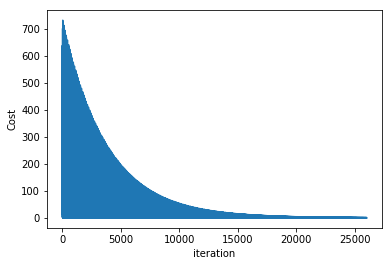

In [43]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [44]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

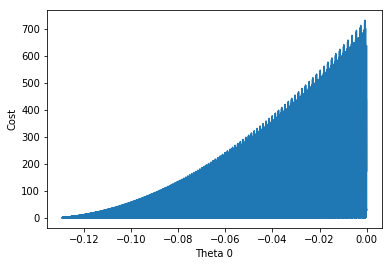

In [45]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

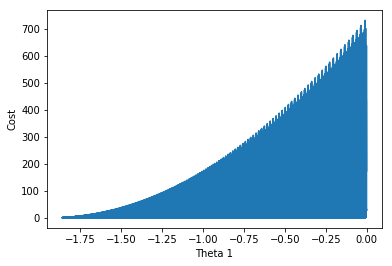

In [46]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

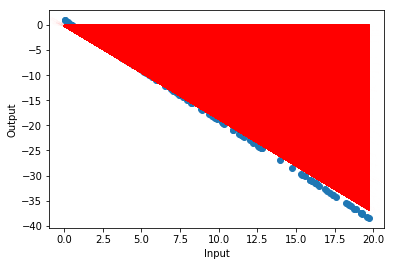

In [48]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

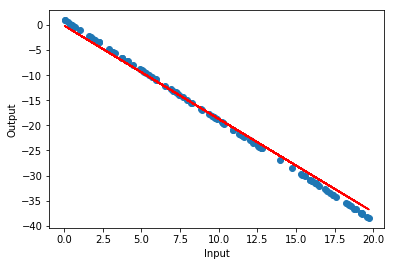

In [49]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [50]:
t,ts,l,it,hy = SGD(X,Y,.001,.001,1000)

Iteration 1 | The Cost is 31.045048
Iteration 2 | The Cost is 572.001755
Iteration 3 | The Cost is 26.227269
Iteration 4 | The Cost is 634.527651
Iteration 5 | The Cost is 169.423386
Iteration 6 | The Cost is 271.133794
Iteration 7 | The Cost is 431.105715
Iteration 8 | The Cost is 190.216270
Iteration 9 | The Cost is 57.526861
Iteration 10 | The Cost is 20.566802
Iteration 11 | The Cost is 2.391809
Iteration 12 | The Cost is 396.605892
Iteration 13 | The Cost is 134.337729
Iteration 14 | The Cost is 13.689936
Iteration 15 | The Cost is 566.181272
Iteration 16 | The Cost is 47.615436
Iteration 17 | The Cost is 116.383904
Iteration 18 | The Cost is 56.299355
Iteration 19 | The Cost is 279.763699
Iteration 20 | The Cost is 235.446192
Iteration 21 | The Cost is 252.143097
Iteration 22 | The Cost is 43.960075
Iteration 23 | The Cost is 51.110098
Iteration 24 | The Cost is 39.545462
Iteration 25 | The Cost is 69.354394
Iteration 26 | The Cost is 10.666938
Iteration 27 | The Cost is 14.87833

Iteration 786 | The Cost is 10.875606
Iteration 787 | The Cost is 21.550627
Iteration 788 | The Cost is 88.620807
Iteration 789 | The Cost is 9.938652
Iteration 790 | The Cost is 0.409972
Iteration 791 | The Cost is 68.959011
Iteration 792 | The Cost is 0.159016
Iteration 793 | The Cost is 18.187072
Iteration 794 | The Cost is 66.748765
Iteration 795 | The Cost is 21.429369
Iteration 796 | The Cost is 15.288978
Iteration 797 | The Cost is 57.967484
Iteration 798 | The Cost is 0.311509
Iteration 799 | The Cost is 27.174132
Iteration 800 | The Cost is 12.411136
Iteration 801 | The Cost is 2.386019
Iteration 802 | The Cost is 69.081889
Iteration 803 | The Cost is 1.901529
Iteration 804 | The Cost is 77.145501
Iteration 805 | The Cost is 18.428127
Iteration 806 | The Cost is 30.985429
Iteration 807 | The Cost is 51.168165
Iteration 808 | The Cost is 20.985543
Iteration 809 | The Cost is 5.243767
Iteration 810 | The Cost is 1.355325
Iteration 811 | The Cost is 0.003701
Iteration 812 | The C

Iteration 1483 | The Cost is 11.039774
Iteration 1484 | The Cost is 0.797268
Iteration 1485 | The Cost is 0.090011
Iteration 1486 | The Cost is 1.154132
Iteration 1487 | The Cost is 2.858945
Iteration 1488 | The Cost is 15.046125
Iteration 1489 | The Cost is 1.017975
Iteration 1490 | The Cost is 0.533705
Iteration 1491 | The Cost is 11.371738
Iteration 1492 | The Cost is 0.064398
Iteration 1493 | The Cost is 2.310771
Iteration 1494 | The Cost is 10.974807
Iteration 1495 | The Cost is 2.851376
Iteration 1496 | The Cost is 1.846607
Iteration 1497 | The Cost is 9.363835
Iteration 1498 | The Cost is 0.479813
Iteration 1499 | The Cost is 3.835164
Iteration 1500 | The Cost is 1.398221
Iteration 1501 | The Cost is 0.074899
Iteration 1502 | The Cost is 11.449042
Iteration 1503 | The Cost is 0.039176
Iteration 1504 | The Cost is 12.975548
Iteration 1505 | The Cost is 2.366807
Iteration 1506 | The Cost is 4.514492
Iteration 1507 | The Cost is 8.153529
Iteration 1508 | The Cost is 2.797874
Iterat

Iteration 2279 | The Cost is 0.402869
Iteration 2280 | The Cost is 2.270038
Iteration 2281 | The Cost is 2.285271
Iteration 2282 | The Cost is 0.275463
Iteration 2283 | The Cost is 1.593598
Iteration 2284 | The Cost is 0.002111
Iteration 2285 | The Cost is 0.304478
Iteration 2286 | The Cost is 0.018805
Iteration 2287 | The Cost is 0.199364
Iteration 2288 | The Cost is 2.385156
Iteration 2289 | The Cost is 0.011127
Iteration 2290 | The Cost is 0.589100
Iteration 2291 | The Cost is 1.669528
Iteration 2292 | The Cost is 0.278801
Iteration 2293 | The Cost is 0.131835
Iteration 2294 | The Cost is 1.598404
Iteration 2295 | The Cost is 0.201445
Iteration 2296 | The Cost is 0.080334
Iteration 2297 | The Cost is 1.298662
Iteration 2298 | The Cost is 0.560036
Iteration 2299 | The Cost is 0.343512
Iteration 2300 | The Cost is 0.038385
Iteration 2301 | The Cost is 0.068412
Iteration 2302 | The Cost is 1.703630
Iteration 2303 | The Cost is 0.089607
Iteration 2304 | The Cost is 2.007612
Iteration 23